# ***Assignment_3_Linked_List.***

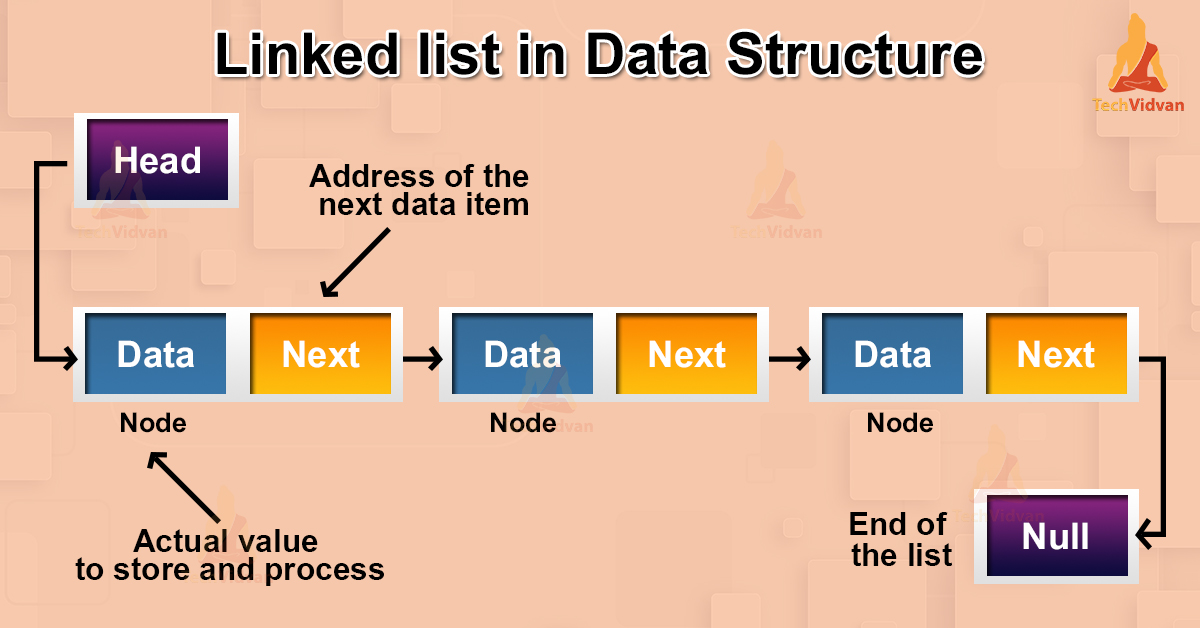

# SIRS FINAL ANSWER learning

In [ ]:
class Node:
    def __init__(self,item=None,next=None):  #Here data = item
        self.item = item
        self.next = next

class SLL:
    def __init__(self,start=None):
        self.start = start

    def is_empty(self):
        return self.start==None

    def insert_at_start(self,data):
        n = Node(data,self.start)
        self.start = n

    def insert_at_last(self,data):
        n=Node(data)
        if not self.is_empty(): #if empty then true and not means if its not Empty
            temp = self.start
            while temp.next is not None:
                temp = temp.next
            temp.next = n
        else:
            self.start = n

    def search(self,data):
        temp = self.start
        while temp is not None:
            if temp.item == data:
                return temp
            temp = temp.next
        return None

    def insert_after(self,temp,data):
        if temp is not None:
            n=Node(data,temp.next)
            temp.next = n
    #When Calling this Function we use search function also
    #mylist.insert_after(mylist.search(20),25) like this so it gives temps value

    def print_list(self):
        temp = self.start
        while temp is not None:
            print(temp.item,end = " ")
            temp = temp.next

    def delete_first(self):
        if self.start is not None:
            self.start = self.start.next

    def delete_last(self):
        if self.start is None:
            pass
        elif self.start.next is None:
            self.start = None # it checks if oonly one Node
        else:
            temp = self.start
            while temp.next.next is not None: #it goes till 2nd last
                temp = temp.next
            temp.next = None #hence when found 2nd last node change its next to None

    def delete_item(self,data):
        if self.start is None:
            pass

        elif self.start.next is None:
            if self.start.item == data:
                self.start = None
        else:
            temp=self.start
            # 1st check if data is on the 1st Node itself
            if temp.item==data:
                self.start=temp.next
            else:
                while temp.next is not None: # To itterate till the last
                    if temp.next.item==data:
                        temp.next=temp.next.next
                        break
                    temp=temp.next
#Here we already checked the 1st Node so we will keep temp on the 1st Node while checking if data is matching oon the 2nd noode

    def __iter__(self):
        return SLLIterator(self.start)

class SLLIterator:
    def __init__(self,start):
        self.current=start

    def __iter__(self):
        return self

    def __next__(self):
        if not self.current:
            raise StopIteration
        data=self.current.item
        self.current=self.current.next
        return data

#driver Code
mylist=SLL()
mylist.insert_at_start(20)
mylist.insert_at_start(10)
mylist.insert_at_last(30)
mylist.insert_after(mylist.search(20),25)
mylist.print_list()
mylist.delete_item(30)
print()

for x in mylist:
    print(x,end=' ')

print()


10 20 25 30 
10 20 25 


# MY FINAL ANSWER

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data): # Here it needs improvement for the case when inserting after is the last node
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

    def print_all(self):
        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
            i += 1
            print(f"This {traverser.data} is {i}th element of the list")
            traverser = traverser.next
        print("Hence the List is complete")

    # Iterator initialization
    def __iter__(self):
        self.current = self.start
        return self

    # Iterator iteration
    def __next__(self):
        if self.current is not None:
            data = self.current.data
            self.current = self.current.next
            return data
        else:
            raise StopIteration()

    def delete_first(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        self.start = current.next # Here we can instead not use current at all
        del current  # Delete the old first node to free up memory  DEL current is no usee // Only req in C/c++
        # USING DEL CURRENT IS NOT REQUIRED IN PY BECAUSE OF AUTOMATIC MEMMORY MANAGEMENT

    def delete_last(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        # If there's only one node
        if self.start.next is None:
            self.start = None
            return

        current = self.start

        while current.next.next is not None:
            current = current.next

# THIS ALL below is we doing to del Last_node but its not req hence
        #BY ADDING ONLY ONE LINE WE CAN SAVE 3 lines of CODE BELOW

        #current.next = None

        # Now 'current' points to the second-to-last node
        last_node = current.next
        current.next = None  # Set the 'next' of the second-to-last node to None
        del last_node  # Delete the last node

    def delete_item(self, data):
        # Case 1: If the element to be deleted is the first one
        if self.start.data == data:
            deleted_node = self.start
            self.start = self.start.next
            del deleted_node  # Delete the old first node to free up memory
            return

        current = self.start

        # Case 2: If the element to be deleted is in the middle or the last
        while current.next is not None:
            if current.next.data == data:
                deleted_node = current.next
                current.next = current.next.next
                del deleted_node  # Delete the node to free up memory
                return
            current = current.next

        # Case 3: If the element is not found
        print(f"Data '{data}' not found in the linked list.")


### 1. Define a class Node to describe a node of a singly linked list.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None




### 2. Define a class SLL to implement Singly Linked List with __init__ () method to create and initialise start reference variable.

In [ ]:
class SLL:
  def __init__(self):
      self.start = None

### 3. Define a method is_empty() to check if the linked list is empty in SLL class.


In [ ]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:

  def __init__(self):
      self.start = None

  def is_empty(self):
    return self.start is None #If its true than it will return True or False




### 4. In class SLL, define a method insert_at_start() to insert an element at the starting of the list.

In [ ]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:

  def __init__(self):
      self.start = None

  def is_empty(self):
    return self.start is None #If its true than it will return True or False

  def insert_at_start(self,data):
    new_node = Node(data)
    new_node.next = self.start
    self.start = new_node



### 5. In class SLL, define a method insert_at_last() to insert an element at the end of the list.

In [ ]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:

  def __init__(self):
      self.start = None

  def is_empty(self):
    return self.start is None #If its true than it will return True or False

  def insert_at_start(self,data):
    new_node = Node(data)
    new_node.next = self.start
    self.start = new_node

  def insert_at_last(self,data):
    new_node = Node(data)

    if self.start is None:
      self.start = new_node

    else:
      current = self.start
      while current.next is not None:
          current = current.next
      current.next = new_node


### 6. In class SLL, define a method search() to find the node with specified element value.


In [ ]:
class Node:

    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:

  def __init__(self):
      self.start = None

  def is_empty(self):
    return self.start is None #If its true than it will return True or False

  def insert_at_start(self,data):
    new_node = Node(data)
    new_node.next = self.start
    self.start = new_node

  def insert_at_last(self,data):
    new_node = Node(data)

    if self.start is None:
      self.start = new_node

    else:
      current = self.start
      while current.next is not None:
          current = current.next
      current.next = new_node

  def search(self, data):
      if self.start is None:
          print("The Linked List is Empty")
          return

      current = self.start
      i = 0
      while current is not None:
          if current.data == data:
              print(f"Data '{data}' found in the {i}th Node. Congratulations!")
              return
          current = current.next
          i += 1

      print(f"Data '{data}' not found in the linked list.")






### 7. In class SLL, define a method insert_after() to insert a new node after a given node of the list.



In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

### 8. In class SLL, define a method to print all the elements of the list.




In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")


    def print_all(self):

        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
              i += 1
              print(f"This {traverser.data} is {i}th element of the list")
              traverser = traverser.next
        print("Hence the List is complete")






### 9. In class SLL, implement iterator for SLL to access all the elements of the list in a sequence.





In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        new_node = Node(data)
        new_node.next = self.start
        self.start = new_node

    def insert_at_last(self, data):
        new_node = Node(data)
        if self.start is None:
            self.start = new_node
        else:
            current = self.start
            while current.next is not None:
                current = current.next
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return
        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1
        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return
        current = self.start
        new_node = Node(new_data)
        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

    def print_all(self):
        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
            i += 1
            print(f"This {traverser.data} is {i}th element of the list")
            traverser = traverser.next
        print("Hence the List is complete")

    # Iterator initialization
    def __iter__(self):
        self.current = self.start
        return self

    # Iterator iteration
    def __next__(self):
        if self.current is not None:
            data = self.current.data
            self.current = self.current.next
            return data
        else:
            raise StopIteration()

# Example of how to use the iterator
sll = SLL()
sll.insert_at_last(1)
sll.insert_at_last(2)
sll.insert_at_last(3)
sll.insert_after(5,2)
sll.insert_after(10,3)
i=0
for data in sll:
    i += 1
    print(f"The {i}th {data}")


The 1th 1
The 2th 2
The 3th 5
The 4th 3
The 5th 10


### 10. In class SLL, define a method delete_first() to delete first element from the list.


In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

    def print_all(self):
        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
            i += 1
            print(f"This {traverser.data} is {i}th element of the list")
            traverser = traverser.next
        print("Hence the List is complete")

    # Iterator initialization
    def __iter__(self):
        self.current = self.start
        return self

    # Iterator iteration
    def __next__(self):
        if self.current is not None:
            data = self.current.data
            self.current = self.current.next
            return data
        else:
            raise StopIteration()

    def delete_first(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        self.start = current.next
        del current  # Delete the old first node to free up memory


### 11. In class SLL, define a method delete_last() to delete last element from the list.


In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

    def print_all(self):
        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
            i += 1
            print(f"This {traverser.data} is {i}th element of the list")
            traverser = traverser.next
        print("Hence the List is complete")

    # Iterator initialization
    def __iter__(self):
        self.current = self.start
        return self

    # Iterator iteration
    def __next__(self):
        if self.current is not None:
            data = self.current.data
            self.current = self.current.next
            return data
        else:
            raise StopIteration()

    def delete_first(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        self.start = current.next
        del current  # Delete the old first node to free up memory

    def delete_last(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        # If there's only one node
        if self.start.next is None:
            self.start = None
            return

        current = self.start

        while current.next.next is not None:
            current = current.next

        # Now 'current' points to the second-to-last node
        last_node = current.next
        current.next = None  # Set the 'next' of the second-to-last node to None
        del last_node  # Delete the last node




### 12. In class SLL, define a method delete_item() to delete specified element from the list.

In [ ]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class SLL:
    def __init__(self):
        self.start = None

    def is_empty(self):
        return self.start is None

    def insert_at_start(self, data):
        # Create a new node
        new_node = Node(data)
        # Set the new node to point to the current start node
        new_node.next = self.start
        # Update the start to the new node
        self.start = new_node

    def insert_at_last(self, data):
        # Create a new node
        new_node = Node(data)

        if self.start is None:
            # If the list is empty, set the new node as the start
            self.start = new_node
        else:
            # Traverse the list to find the last node
            current = self.start
            while current.next is not None:
                current = current.next
            # Set the next of the last node to the new node
            current.next = new_node

    def search(self, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        i = 0
        while current is not None:
            if current.data == data:
                print(f"Data '{data}' found in the {i}th Node. Congratulations!")
                return
            current = current.next
            i += 1

        print(f"Data '{data}' not found in the linked list.")

    def insert_after(self, new_data, data):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        new_node = Node(new_data)

        while current is not None:
            if data == current.data:
                new_node.next = current.next
                current.next = new_node
                return
            current = current.next
        print(f"Data '{data}' not found in the linked list.")

    def print_all(self):
        if self.start is None:
            print("The Linked List is Empty")
            return
        i = 0
        traverser = self.start
        while traverser is not None:
            i += 1
            print(f"This {traverser.data} is {i}th element of the list")
            traverser = traverser.next
        print("Hence the List is complete")

    # Iterator initialization
    def __iter__(self):
        self.current = self.start
        return self

    # Iterator iteration
    def __next__(self):
        if self.current is not None:
            data = self.current.data
            self.current = self.current.next
            return data
        else:
            raise StopIteration()

    def delete_first(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        current = self.start
        self.start = current.next
        del current  # Delete the old first node to free up memory

    def delete_last(self):
        if self.start is None:
            print("The Linked List is Empty")
            return

        # If there's only one node
        if self.start.next is None:
            self.start = None
            return

        current = self.start

        while current.next.next is not None:
            current = current.next

        # Now 'current' points to the second-to-last node
        last_node = current.next
        current.next = None  # Set the 'next' of the second-to-last node to None
        del last_node  # Delete the last node

    def delete_item(self, data):
        # Case 1: If the element to be deleted is the first one
        if self.start.data == data:
            deleted_node = self.start
            self.start = self.start.next
            del deleted_node  # Delete the old first node to free up memory
            return

        current = self.start

        # Case 2: If the element to be deleted is in the middle or the last
        while current.next is not None:
            if current.next.data == data:
                deleted_node = current.next
                current.next = current.next.next
                del deleted_node  # Delete the node to free up memory
                return
            current = current.next

        # Case 3: If the element is not found
        print(f"Data '{data}' not found in the linked list.")
